In [51]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

plt.style.use('dark_background')

In [52]:
model = load_model('100_spiral_model.h5')

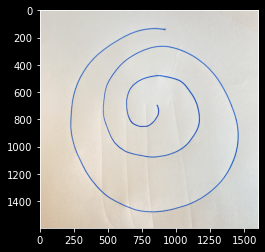

In [53]:
cur_dir = os.getcwd()
img_path = os.path.join('/Users/mahimairaja/Desktop/image.jpg')

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

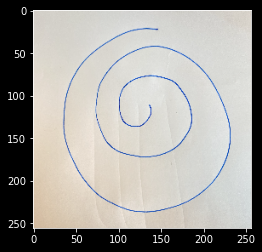

In [54]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [55]:
prediction = model.predict(np.expand_dims(resize/255, 0))

print(prediction)

[[0.9945224]]


In [56]:
if prediction < 0.5: 
    print(f'The person is Healthy')
else:
    print(f'The person may have parkinson')

The person may have parkinson


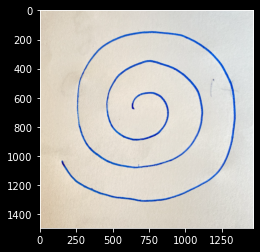

In [57]:
img_path = os.path.join('/Users/mahimairaja/Desktop/test2.png')

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

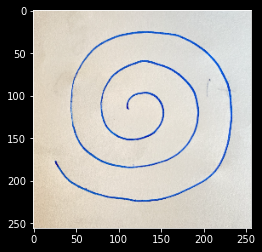

In [58]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [59]:
prediction = model.predict(np.expand_dims(resize/255, 0))

print(prediction)

[[0.9800578]]


In [60]:
if prediction < 0.5: 
    print(f'The person is Healthy')
else:
    print(f'The person may have parkinson')

The person may have parkinson


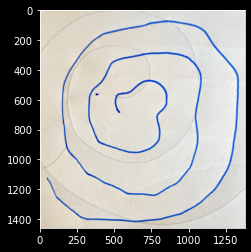

In [61]:
img_path = os.path.join('/Users/mahimairaja/Desktop/test3.png')

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

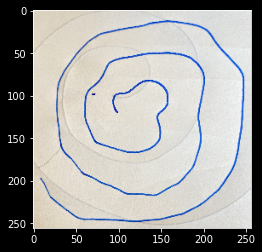

In [62]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [63]:
prediction = model.predict(np.expand_dims(resize/255, 0))

print(prediction)

[[1.]]


In [64]:
if prediction < 0.5: 
    print(f'The person is Healthy')
else:
    print(f'The person may have parkinson')

The person may have parkinson
